# Machine Learning - Getting Started

## Part 1. Julia basics
We start with some basic numerical operations. 

In [1]:
println("Hello World!")

Hello World!


One thing you may have noticed - it takes time for Julia to respond. This is due to the JIT compiling mechanism Julia adopts and it happens when some packages are first loaded into memory. The next time you run the code it just flies! Click back on the previous cell and run it again - you'll see. 

Now we deal with simple assignment, and for loops.

In [2]:
a = 1

1

In [3]:
a^2    # The power of 2. Julia seems to prefer LaTeX when it comes to notations!

1

Now, let's make a simple array, and access its elements using indeces. Note, the index of a Julia array starts at 1 (rather than 0, as in C / Python); the last element can be accessed by using index "end":

In [4]:
v = [1, 2, 3, 4, 5]
println("v's 1st element is ", v[1])
println("v's last element is ", v[end])

v's 1st element is 1
v's last element is 5


In [5]:
# Here's a for loop
for a in [1, 11, 111, 1111, 11111]
    println(a^2)  # print out a square
end

1
121
12321
1234321
123454321


In [6]:
# Or, a longer series generated in the loop
a=1
for i in 1:9  # use a range
    println(a^2)
    a = 10a + 1 
end

1
121
12321
1234321
123454321
12345654321
1234567654321
123456787654321
12345678987654321


A frequently used trick is to use an empty array, and push new result into it. IMPORTANT: In Julia, whenever we want a function to change the content of its variable(s), we need to add a "!" after the function name! Hence "push!()", not "push()".

In [7]:
a=1
res = Int64[]  # Create an empty array of integers
for i in 1:9
    push!(res, a*a)  # Append the square number to the array
    a = 10a + 1
end
println(res)  # Here comes a long array

[1, 121, 12321, 1234321, 123454321, 12345654321, 1234567654321, 123456787654321, 12345678987654321]


In [8]:
# Another simpler implementation, generating strings, then converting strings to numbers
astr=["1"^i for i in 1:9]
res = parse.(Int, astr).^2

9-element Vector{Int64}:
                 1
               121
             12321
           1234321
         123454321
       12345654321
     1234567654321
   123456787654321
 12345678987654321

Note, in the cell above the "." modifiers make the following operation/function to be applied to *every* element of the array - this is called a *broadcast*, a very useful mechanism in Julia.
## Part 2 - Arrays
Now we work on more vector/array operations. 
### Norms
Let's work out the $\ell_2$ norm of a vector.

In [9]:
x = [1, 2, 2]
print("Norm2 of x is ", sqrt(sum(x .* x)))

Norm2 of x is 3.0

We can use the LinearAlgebra function norm(x, p) to calculate $\ell_p$. The following code gives the same result as above:

In [10]:
using LinearAlgebra
norm(x)   # default p is 2, giving Euclidean norm

3.0

Try other Minkowskis $\ell_1$ and $\ell_{1/2}$:

In [11]:
norm(x, 1)

5.0

In [12]:
norm(x, 0.5)

14.656854249492378

We can write a function for Euclidean norm $(\sum x_i^2)^{1/2}$:

In [13]:
function my_euclnorm(x)
    sum(x.^2)^0.5
end

my_euclnorm (generic function with 1 method)

In [14]:
# test it 
my_euclnorm(x)

3.0

**Task 1a:** Write your own function to calculate $\ell_p$, defined as $(\sum |x_i|^p)^{1/p}$:

In [15]:
function my_lp(x, p)
    (sum((abs.(x)).^p))^(1/p)
end

my_lp (generic function with 1 method)

**Task 1b:** Test your implementation using the examples above:

In [16]:
# testing code
my_lp(x, 0.5)

14.656854249492378

Now let's try a matrix, i.e., a 2-D array:

In [17]:
A = [1 2; 3 4]

2×2 Matrix{Int64}:
 1  2
 3  4

In [18]:
A[1, :]  # gives first "row" as a column vector

2-element Vector{Int64}:
 1
 2

In [19]:
A[:, 2]  # gives the 2nd column

2-element Vector{Int64}:
 2
 4

In [20]:
inv(A) # gives inverse of A

2×2 Matrix{Float64}:
 -2.0   1.0
  1.5  -0.5

In [21]:
inv(A)*A # inv(A) multiplies A of course gives the identity matrix [1.0 0.0; 0.0 1.0]

2×2 Matrix{Float64}:
 1.0          0.0
 2.22045e-16  1.0

In [22]:
norm(A) # gives the Frobenius norm

5.477225575051661

We can work out the power of matrices, e.g. $A^2$

In [23]:
A^2

2×2 Matrix{Int64}:
  7  10
 15  22

The following example transition probability matrix is taken from Talor & Karlin's book *An Introdution to Statistical Modeling*:

In [24]:
P = [0.7 0.2 0.1;  0.2 0.6 0.2; 0.1 0.4 0.5]   # transition prob.

3×3 Matrix{Float64}:
 0.7  0.2  0.1
 0.2  0.6  0.2
 0.1  0.4  0.5

In matrix $P$, each row stands for the father's class (for Lower/Middle/Upper Class, respectively), and the column stands for the son's class (Lower/Middle/Upper). Note values on each row add to 1. 

How to interpret $P$? \
For instance, the probability of a next-generation transition from "Middle" (2nd row), to "Upper" (3rd column), is P[2,3]=0.2. Likewise, the transition probability from "Upper" (3rd row), to "Lower" (1st column), is P[3,1]=0.1. 
Suppose initially a family is of lower class, so we start with an initial status as a row vector v=[1 0 0] (Note: no comma, but spaces!). So we need to calculate a matrix product

$ (1 \ \ 0 \ \ 0) \left(\begin{array}{lll}
0.7 & 0.2 & 0.1 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.4 & 0.5
\end{array}
\right).$ 



In [25]:
p = [1 0 0] 
p*P

1×3 Matrix{Float64}:
 0.7  0.2  0.1

This means, the next generation is not very certain, but still a quite unfavoured outcome: 70% chance in Lower, 20% Middle, and 10% upper. 
Let's then calculate the probablistic status after 10 generations:

In [26]:
p*(P^10)

1×3 Matrix{Float64}:
 0.354317  0.410959  0.234724

Well, that's certainly some social mobility already! 

**Task 2**: Find out where an upper-class family would likely to be after 30 generations; what about a middle-class?

In [27]:
# your code here
using Printf
p = [0.0 0.0 1.0]*(P^30)
println("Upper after  30 gen.: ", [@sprintf "%.3f" a for a in [0.0 0.0 1.0]*(P^30)])
println("Mid after  30 gen.: ", [@sprintf "%.3f" a for a in [0.0 1.0 0.0]*(P^30)])

Upper after  30 gen.: ["0.353" "0.412" "0.235"]
Mid after  30 gen.: ["0.353" "0.412" "0.235"]


Note in the above cell, "Printf" is used to print out floating numbers in a specified format (with three decimal places). The following gives another example: 

In [28]:
@sprintf "%.5f" π

"3.14159"

**Comment on your findings:** 
- Regardless of where a family's social status is, after 30 generations or so they all end up with the same chances to be in upper, middle or lower classes (0.35, 0.41 and 0.24 in probability respectively).
- The converged probability vector $p$=[0.35, 0.41, 0.24] is unchanged by its multiplication with P, i.e., $pP=p$, i.e. it gives the stationary distribution of social movement. In Linear Algebra, we say $p$ is the eigenvector of $P$ with an eigenvalue of 1. 

*Note:* If we fill in P with the transition probabilities between webpages (i.e, by clicking on a certain link from one page goes to the next page), we can use the same mechanism, so-called "Markov chains", to model people's web browsing behavious instead of social movement. Based on the stationary distribution of webpages, we can rank the webpages. In fact, this is the essence of the famous PageRank algorithm by Google. 

## Part 3 - plotting
Let's generate some random data and try out a few useful plots. 

In [29]:
# import Pkg; Pkg.add("Plots")
using Plots

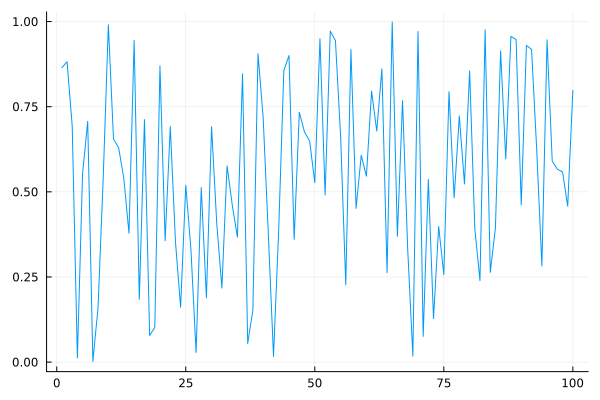

In [30]:
# generate 100 random numbers of uniform distribution within [0, 1]
a = rand(100)
# plot them out
plot(a, label="")

We can plot out two arrays for comparison. Here's an example:

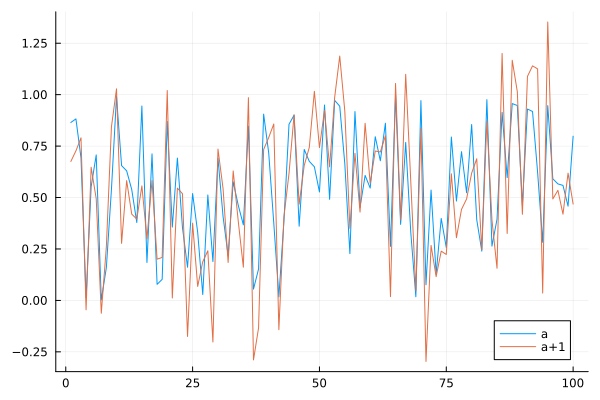

In [31]:
b = a .+ 0.2 * randn(100)  # Get a noisy version of array a; randn = N(0,1)
plot([a b], label=["a" "a+1"]) # Plot two arrays using aligned labels

We may also specify a layout to display things side-by-side. This results in subplots as shown below:

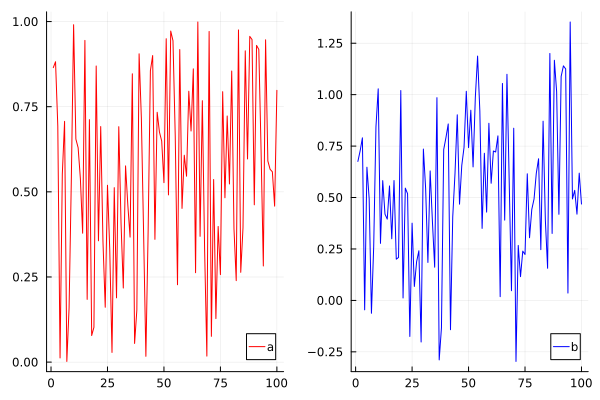

In [32]:
plot([a b], label=["a" "b"], layout=(1, 2), c=["red" "blue"])

**Task 3:** Plot beside subplots "a" and "b" another subplot showing the difference series a.-b .

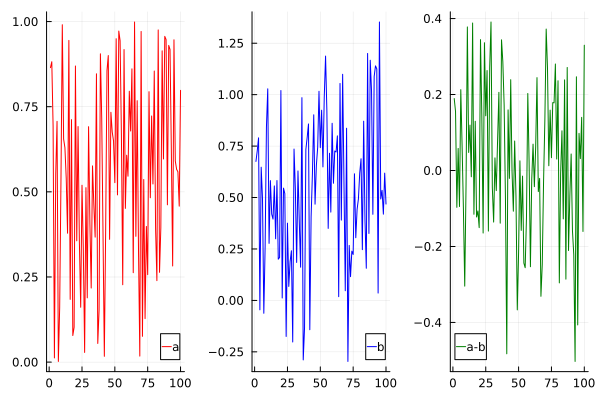

In [33]:
# your code here
plot([a b a.-b], label=["a" "b" "a-b"], layout=(1, 3), c=["red" "blue" "green"])

Another useful plot type is scatter plots, often used to visualize data by choosing two attributes. Here we generate some 2-D blobs and display their scatter plot one after another. Note the second call to "scatter" uses an exclamation mark (!) to update the plot with new content (without wiping off the first plot). 

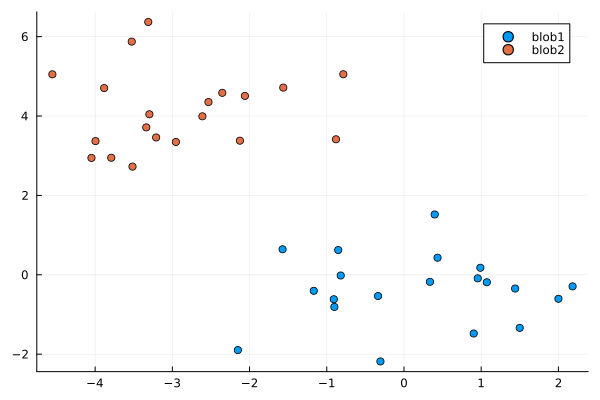

In [34]:
blob1 = randn(2, 20)
blob2 = randn(2, 20) .+ [-3, 4]
scatter(blob1[1, :], blob1[2, :], label="blob1")
scatter!(blob2[1, :], blob2[2, :], label="blob2")

**Task 4:** Add another blob that's centred at [2,4] and show the scatter plot of all three blobs.

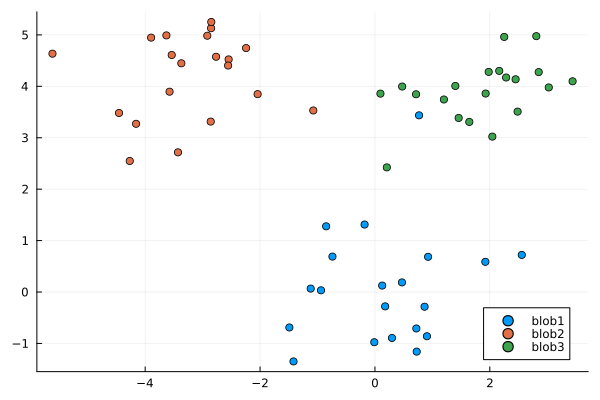

In [35]:
# your code here
blob1 = randn(2, 20)
blob2 = randn(2, 20) .+ [-3, 4]
blob3 = randn(2, 20) .+ [2, 4]
scatter(blob1[1, :], blob1[2, :], label="blob1")
scatter!(blob2[1, :], blob2[2, :], label="blob2")
scatter!(blob3[1, :], blob3[2, :], label="blob3")

## Extra: performance tuning

These are some additional notes not directly related to Machine Learning but may be useful - FYI. 

Usually Julia works quite fast, but at times we may need to take care of memory allocation etc. to speed up our code. 

In [36]:
A = randn(1000, 1000)   # a 1000x1000 matrix with random Gaussian-distributed values

1000×1000 Matrix{Float64}:
 -0.263409   -0.317264    -0.579612   …   0.473903    0.340056  -0.593714
  0.779286   -2.15822      1.83555        0.638082   -0.540193  -0.642506
  0.250113   -0.748077     0.311206       2.57876     1.45965   -0.0125069
 -0.816147    1.57544      0.410151      -0.0755247  -0.788134   0.333805
 -1.04353    -1.23984      0.448952       0.13365    -0.452317   0.58365
  0.24314     0.0454533   -0.993551   …   0.59219     0.207789  -0.906526
  0.60134    -0.513251    -0.198694      -0.699296   -1.32252    2.24433
 -1.43105    -0.917325     0.664709       0.224434    0.411641  -0.306153
  0.115136    0.390551     1.58548        1.47292    -0.086107  -0.798261
  0.838671   -0.554058     0.421944      -0.221319   -0.094933  -0.804231
 -0.122136    0.57407     -1.0397     …   0.441741   -0.245465   0.45582
 -0.0236335  -1.00761     -0.397056      -0.848133    0.748612  -0.29469
  1.11957     0.461116    -0.0338618      0.892522   -1.03652    0.748671
  ⋮           

In [37]:
#import Pkg; Pkg.add("BenchmarkTools")
using BenchmarkTools

In [38]:
@btime @view A[1,:]

  127.107 ns (2 allocations: 64 bytes)


1000-element view(::Matrix{Float64}, 1, :) with eltype Float64:
 -0.2634094025175531
 -0.3172635185336222
 -0.5796118455357961
  0.8281790032802567
 -1.6790675288288348
 -1.1233932208472803
 -0.20396689982732077
 -1.0478003331202796
 -0.9455998686350355
  0.5918046381211463
 -0.4650292481447435
  0.7777291335724038
  0.3483427305633072
  ⋮
 -0.3687903938417003
  1.1097828923633686
 -1.3443322840554348
 -0.6532079352961958
  2.2655112097961188
  1.6621229272768163
  0.9680115096149023
 -1.2067187697985937
  3.529478137067453
  0.47390289961362253
  0.3400556747040763
 -0.5937137229529837

In [39]:
@btime A[1,:]

  900.000 ns (2 allocations: 7.95 KiB)


1000-element Vector{Float64}:
 -0.2634094025175531
 -0.3172635185336222
 -0.5796118455357961
  0.8281790032802567
 -1.6790675288288348
 -1.1233932208472803
 -0.20396689982732077
 -1.0478003331202796
 -0.9455998686350355
  0.5918046381211463
 -0.4650292481447435
  0.7777291335724038
  0.3483427305633072
  ⋮
 -0.3687903938417003
  1.1097828923633686
 -1.3443322840554348
 -0.6532079352961958
  2.2655112097961188
  1.6621229272768163
  0.9680115096149023
 -1.2067187697985937
  3.529478137067453
  0.47390289961362253
  0.3400556747040763
 -0.5937137229529837

The performance margin maintains when floating point calculations are involved. E.g., dot product between two rows requires half in time, and one-third in memory: 

In [40]:
@btime A[1,:] .* A[2,:];

  2.450 μs (7 allocations: 23.91 KiB)


In [41]:
@btime (@view A[1,:]) .* (@view A[2,:]);

  1.560 μs (7 allocations: 8.25 KiB)


One more fact: column-wise operations work faster in Julia (not Julia's fault - just blame those guys who invented spreadsheets -- we are now more used to store data as row vectors ;0))

In [42]:
@btime (@view A[:,1]) .* (@view A[:,1]);

  960.000 ns (7 allocations: 8.25 KiB)
